<a href="https://colab.research.google.com/github/dctime/minecraft-texture-generation/blob/main/texture_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import zipfile
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [111]:
with zipfile.ZipFile('drive/MyDrive/Minecraft Texture Generator/minecraft_texture_with_resized_16.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [112]:
for filename in os.listdir('dataset/minecraft_texture_with_resize_16'):
    print(filename)

Streaming output truncated to the last 5000 lines.
broken_head_materialis_refined_glowstone.png
countbyitem.png
birch_japanese_door.png
springrollitem.png
reinforced_cyan_stained_glass_pane_top.png
buttertartitem.png
printed_silicon.png
electrum_coin_1.png
neon_cactus_big_side.png
huge_stalk.png
naga.png
copper_ore&&&&&&.png
paper_left.png
potted_chillweed_overlay.png
light_blue_terracotta_6_ctm.png
crescendo.png
draconic_bow_pulling_2.png
ocean_stone.png
sign_maple.png
naturescompass_09.png
tconstruct_embellishment_tconstruct_slimesteel.png
capacitor_creative_up_none.png
sp_thaumium_base.png
wood_to_obsidian_conversion_kit.png
revolver_metal.png
nightshade_sprouts.png
tin_ingot&&.png
interface_fluid.png
stone_essence.png
hammer_slash_7.png
chorus_plant_roots.png
paper_wall.png
infamy_curse.png
material_wire_copper.png
warped_pantry_side.png
nether_wart_block_8.png
peach_travertine_vertical_slab_top.png
polished_marble.png
heavy_crossbow_iron_pulling_0.png
holyprojectile.png
flatgauge5

In [113]:
# ds = tf.keras.preprocessing.image_dataset_from_directory('/content/dataset', image_size=(16, 16), batch_size=1)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/dataset',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(16, 16),
    batch_size=16)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/dataset',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(16, 16),
    batch_size=16)

train_dataset = train_dataset.map(lambda x, y: x)
validation_dataset = validation_dataset.map(lambda x, y: x)
print(train_dataset)
print(validation_dataset)

Found 39461 files belonging to 1 classes.
Using 31569 files for training.
Found 39461 files belonging to 1 classes.
Using 7892 files for validation.
<_MapDataset element_spec=TensorSpec(shape=(None, 16, 16, 3), dtype=tf.float32, name=None)>
<_MapDataset element_spec=TensorSpec(shape=(None, 16, 16, 3), dtype=tf.float32, name=None)>


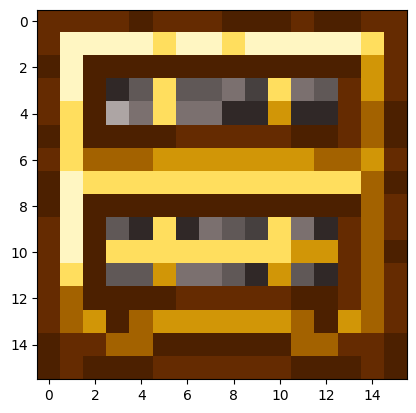

In [114]:
for images in train_dataset:
  image = images[0]
  plt.imshow(image.numpy().astype("uint8"))
  plt.show()
  break

In [115]:
def scale_img(img_ndarray):
  processing = img_ndarray/255
  return processing

train_dataset = train_dataset.map(scale_img)
train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(buffer_size=128)
train_dataset = train_dataset.prefetch(buffer_size=128)


In [116]:
def build_generator():
  model = Sequential()

  model.add(Dense((7*7*128), input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(3, 5, padding='same', activation='sigmoid'))


  return model

In [117]:
build_generator().summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_110 (LeakyReLU)  (None, 6272)             0         
                                                                 
 reshape_22 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_44 (UpSamplin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_110 (Conv2D)         (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_111 (LeakyReLU)  (None, 14, 14, 128)      0         
                                                     

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_115 (LeakyReLU)  (None, 6272)             0         
                                                                 
 reshape_23 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_46 (UpSamplin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_115 (Conv2D)         (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_116 (LeakyReLU)  (None, 14, 14, 128)      0         
                                                     

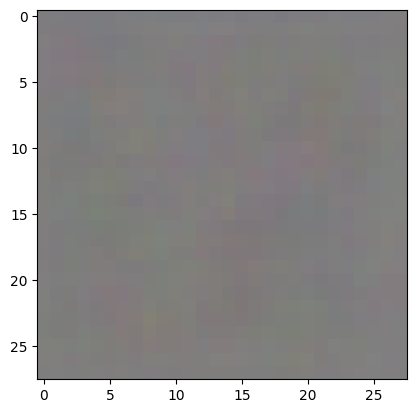

In [118]:
model = build_generator()
model.summary()
random = np.random.randn(1, 128, 1)
print(random)
img = model.predict(random)

print(type(image))
print(type(img))
print(img)
img = img*255
plt.imshow(img[0].astype("uint8"))
plt.show()